In [66]:
import pandas as pd
pd.set_option("display.float_format","{:.4f}".format)

In [67]:
import numpy as np

In [68]:
np.random.seed(42)

In [69]:
X = np.linspace(-3, 3, 80)

In [70]:
y_true = 2 + X + 0.5*X**2

In [71]:
y = y_true + np.random.randn(len(X))*1.5

In [107]:
X_matrix = X.reshape(-1, 1)
X_matrix.shape

(80, 1)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_matrix, y, test_size = 0.2, random_state = 42
)

In [110]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [111]:
OLS = Pipeline([
    ("Scaler", StandardScaler()),
    ("OLS", LinearRegression())
])

In [112]:
Poly2 = Pipeline([
    # x, x^2
    ("Poly2", PolynomialFeatures(degree=2,include_bias=False)),
    ("Scaler", StandardScaler()),
    ("OLS", LinearRegression())
])

In [128]:
Poly8 = Pipeline([
    # x, x^2, x^3, ...., x^8
    ("Poly8", PolynomialFeatures(degree=8,include_bias=False)),
    ("Scaler", StandardScaler()),
    ("OLS", LinearRegression())
])

In [113]:
import matplotlib.pyplot as plt

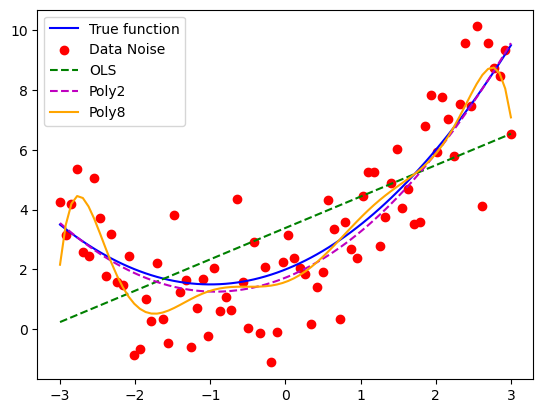

In [131]:
plt.plot(X, y_true, color="blue", label="True function")
plt.scatter(X, y, color="red", label="Data Noise")
plt.plot(X, OLS.fit(X_train,y_train).predict(X_matrix), "g--", label="OLS")
plt.plot(X, Poly2.fit(X_train,y_train).predict(X_matrix), "m--", label="Poly2")
plt.plot(X, Poly8.fit(X_train,y_train).predict(X_matrix), color="orange", label="Poly8")
plt.legend()
plt.show()

In [120]:
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train) 

    #Training Metrics
    y_train_pred = model.predict(X_train)
    sse_train = np.sum((y_train - y_train_pred)**2)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    
    #Testing Metrics
    y_test_pred = model.predict(X_test)
    sse_test = np.sum((y_test - y_test_pred)**2)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    
    results = pd.DataFrame([
        {"Model":name, "Split":"Training", "SSE":sse_train, "MSE":mse_train, "RMSE": rmse_train, "R^2": r2_train},
        {"Model":name, "Split":"Testing",  "SSE":sse_test, "MSE":mse_test, "RMSE": rmse_test, "R^2": r2_test}
    ]).set_index(["Model", "Split"])
    
    return results;

In [122]:
pd.concat([
    evaluate_model("OLS", OLS, X_train, y_train, X_test, y_test),
    evaluate_model("Poly2",Poly2 , X_train, y_train, X_test, y_test),
    evaluate_model("Poly8",Poly2 , X_train, y_train, X_test, y_test)
])

SSE    MSE   RMSE    R^2
Model Split                                 
OLS   Training 273.6990 4.2765 2.0680 0.4431
      Testing   81.9235 5.1202 2.2628 0.2686
Poly2 Training 134.0550 2.0946 1.4473 0.7273
      Testing   26.6878 1.6680 1.2915 0.7617